<a href="https://colab.research.google.com/github/Boukhlifi/MNIST-Digit-Classification/blob/main/MLP_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dense

In [50]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()#la separer directement
print(x_train.shape,"training samples")
print(x_test.shape,"testing samples")
print(y_train.shape,"training samples")
print(y_test.shape,"testing samples")

(60000, 28, 28) training samples
(10000, 28, 28) testing samples
(60000,) training samples
(10000,) testing samples


Text(0.5, 1.0, 'Pixel value distrubution ')

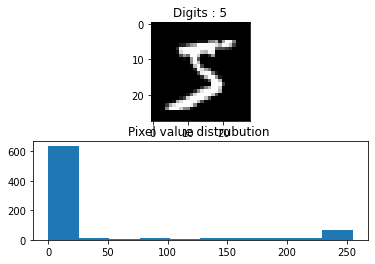

In [31]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray')
plt.title("Digits : {}".format(y_train[0]))
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel value distrubution ")

In [33]:
x_train = x_train.reshape(60000,784)#osu forme d'un vecteur
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255 #normalisisation (/255-0) des variables pour accelerer l'entrainement
x_test /=255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [39]:
#le codage "one_hot" est la representation de variables catégorielles sous la forme de vecteurs binaire
print("shape before one hot encoding : ",y_train.shape)
y_train = keras.utils.to_categorical (y_train,num_classes)
y_test = keras.utils.to_categorical (y_test,10)
print("shape after one hot encoding : ",y_train.shape)

shape before one hot encoding :  (60000,)
shape after one hot encoding :  (60000, 10)


In [40]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [46]:
model = Sequential()
model.add(Dense(512,activation='relu', input_shape =(784,))) #couche caché de 512 neuronnes ,entierement connecté,'relu'=max(0,Z),les valeurs negatives vont prendre 0
model.add(Dense(10,activation='softmax'))#softmax=multiclasse()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [66]:
sgd = optimizers.SGD(lr=0.01)
model.compile(loss= 'categorical_crossentropy',
              optimizer = sgd,
              metrics=['accuracy'])

In [69]:
reuslt = model.fit(x_train,y_train,batch_size=128,epochs = 20,verbose=1,validation_data=(x_test, y_test))
#optimisation des poids pour chaque mini batch de 128 image,
#epochs le nombre d'itérartios
# verbose=1 affichage de processus  pour chaque mini batch

Epoch 1/20


ValueError: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss : ",score[0])
print("test accuracy : ",score[1])

In [64]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#saving the model
save_dir = "https://drive.google.com/drive/folders/1vNHuqhsK_SW0soeUMgdbrOoXet1qug9k?usp=sharing"
model_name ="mlp_digits"
model_path = os.path.join(save_dir,model_name)
print("model saving at : ",model_path)